## Select_and_copy_New_Inlet
Read the image name in the directory, look up their location, and plot.
Use a lat/lon bounding box and image locations in the navigation files to make a list of files inside the bounding box and copy them. 

In [5]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for Pea Island near the experiment site
latmax = 35.692
latmin = 35.672
lonmin = -75.54
lonmax = -75.44

parent_dir = 'D:\\data\\HxDorian_2019\\2019_all_flights_locations'
#locations for August flights
# nav_files = ['2019_0830_ppk-photo-locations-mbase-GP192757.txt',\
#              '2019_0830_ppk-photo-locations-mbase-GP161658.txt']
skiprows = [35, 35]

# Locations for Sep. flights
nav_files = ['2019_0908_ppk-photo-locations-mbase-GP142442.txt']
skiprows = [29]

# nav_files = [ '2019_0912_ppk-photo-locations-mbase-GP151012.txt',\
#              '2019_0912_ppk-photo-locations-5base-GP205057.txt']
# skiprows = [35, 38]

path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

for n in range(len(nav_files)):
    df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                    names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                             'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
    print('n=',n)
    if n == 0:
        #dfs[hort] will accumulate locations inside bounding box
        dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} images.".format(len(dfs)))
        
        # dfa[all] will accumulate all locations
        dfa = df.copy()
        print("{} images now in dfa".format(len(dfa)))

    elif n>0:
        # dft[emp] has new points
        dft = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} more images.".format(len(dft)))
        
        # append new points to dfs
        dfs = dfs.append( dft, ignore_index=True )
        print("{} images now in dfs.".format(len(dfs)))
        dfa = dfa.append( df, ignore_index=True )
        print("{} images now in dfa".format(len(dfa)))


dfs

n= 0
Found 49 images.
6879 images now in dfa


,image_name,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCDate,UTCTime,UTCSeconds
2180,2019-0908-150656-DSC07587-N7251F.jpg,456258.715,3949883.385,299.085,35.691893,-75.483451,260.246,1,0.025,0.014,9/08/2019,15:06:37.035,54397.035
2181,2019-0908-150657-DSC07588-N7251F.jpg,456270.191,3949838.740,297.754,35.691491,-75.483321,258.916,1,0.025,0.014,9/08/2019,15:06:38.037,54398.037
2182,2019-0908-150658-DSC07589-N7251F.jpg,456281.221,3949793.858,296.510,35.691086,-75.483197,257.672,1,0.025,0.014,9/08/2019,15:06:39.037,54399.037
2183,2019-0908-150659-DSC07590-N7251F.jpg,456291.484,3949748.596,295.407,35.690679,-75.483081,256.569,1,0.025,0.014,9/08/2019,15:06:40.039,54400.039
2184,2019-0908-150700-DSC07591-N7251F.jpg,456301.053,3949703.099,294.658,35.690269,-75.482973,255.821,1,0.025,0.014,9/08/2019,15:06:41.040,54401.040
2185,2019-0908-150701-DSC07592-N7251F.jpg,456310.393,3949657.597,294.642,35.689859,-75.482867,255.806,1,0.025,0.014,9/08/2019,15:06:42.040,54402.040
2186,2019-0908-150702-DSC07593-N7251F.jpg,456319.470,3949612.225,295.713,35.689450,-75.482764,256.877,1,0.025,0.014,9/08/2019,15:06:43.041,54403.041
2187,2019-0908-150703-DSC07594-N7251F.jpg,456328.453,3949567.167,297.243,35.689045,-75.482663,258.407,1,0.025,0.014,9/08/2019,15:06:44.043,54404.043
2188,2019-0908-150704-DSC07595-N7251F.jpg,456337.346,3949522.497,298.887,35.688642,-75.482562,260.051,1,0.025,0.014,9/08/2019,15:06:45.043,54405.043
2189,2019-0908-150705-DSC07596-N7251F.jpg,456346.155,3949478.118,300.622,35.688243,-75.482462,261.786,1,0.025,0.014,9/08/2019,15:06:46.045,54406.045


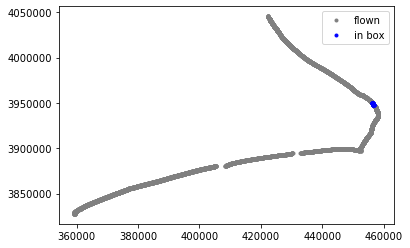

In [6]:
# Make a simple plot
easting = dfa['easting'].values
northing = dfa['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='in box')
plt.legend()
plt.show()

In [10]:
# Copy those files
# local_folders = [\
#            'D:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight1-0830\\',\
#            'D:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight2-0830\\']

local_folders = ['D:\\data\\HxDorian_2019\\post-storm\\images\\jpg\\flight1-0908\\']

# local_folders = ['D:\\data\\HxDorian_2019\\post-storm\\images\\jpg\\flight1-0912\\',\
#                  'D:\\data\\HxDorian_2019\\post-storm\\images\\jpg\\flight2-0912\\',\
#                  'D:\\data\\HxDorian_2019\\post-storm\\images\\jpg\\flight3-0913\\']

attempts = 0
icount = 0
for f in dfs['image_name'].values :
    #local_dest = 'D:\\data\\HxDorian_2019\\2019-08-30_Pea_Island_jpg_New_Inlet\\'+f
    
    local_dest = 'D:\\data\\HxDorian_2019\\2019-09-08_Pea_Island_jpg_New_Inlet\\'+f        

    #local_dest = 'D:\\data\\HxDorian_2019\\2019-09-12-13_Pea_Island_jpg_New_Inlet\\'+f
    for s3f in local_folders:
        try:
            attempts = attempts+1
            src_key = s3f+f
            #print("Trying {}\nto {}".format(src_key,local_dest))
            shutil.copyfile(src_key, local_dest)
            print("Copied "+local_dest)
            icount = icount +1
        except OSError as err:
            #print("Fail: "+src_key+'\nto: '+local_dest)
            print(err)
            attempts = attempts+1

          
print("Copied {} files.".format(icount))
print("Attempted {} files.".format(attempts))

Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150656-DSC07587-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150657-DSC07588-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150658-DSC07589-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150659-DSC07590-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150700-DSC07591-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150701-DSC07592-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150702-DSC07593-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150703-DSC07594-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150704-DSC07595-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-08_Pea_Island_jpg_New_Inlet\2019-0908-150705-